In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import date,timedelta
import os
import boto3
from io import BytesIO

import sys

s3=boto3.client('s3')
bucketName=bucketName = 'open-weather-data-storage'
csv_buffer = BytesIO()
yesterdaysDate = date.today() - timedelta(days=1)
realDate = str(yesterdaysDate)
day= realDate[-2] + realDate[-1]
month=realDate[5] + realDate[6]
year=realDate[0:4]
filePath = f'processed/dailyDatasets/dailyWeatherData_{day}_{month}_{year}.csv'

def downloadFiles(csv_buffer,fileName):
    
    try:
        
        
        s3.download_fileobj(bucketName, f'{fileName}', csv_buffer)
       
        csv_buffer = BytesIO(csv_buffer.getvalue())
        df = pd.read_csv(csv_buffer)

        return df
        
        
    except Exception as e:
        raise e



cleanDf = downloadFiles(csv_buffer,filePath)
cleanDf.head()

c:\Users\KimKa\Desktop\ML Project 2


,city,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds,weather,sunrise time,sunset time,Region,Direction
0,Windhoek,21.27,21.49,21.27,21.90,1013.0,78.0,1.03,98.0,Overcast Clouds,06:16:20,19:41:25,Khomas,Central
1,Swakopmund,19.43,19.62,19.43,19.43,1011.0,84.0,1.35,22.0,Few Clouds,06:26:18,19:51:52,Erongo,West
2,Walvis Bay,18.53,18.74,18.53,18.53,1011.0,88.0,1.03,4.0,Clear Sky,06:25:53,19:52:31,Erongo,West
3,Arandis,24.18,23.85,24.18,24.18,1011.0,46.0,1.30,21.0,Few Clouds,06:25:05,19:49:36,Erongo,West
4,Usakos,29.58,28.75,29.58,29.58,1011.0,35.0,4.07,77.0,Broken Clouds,06:23:22,19:46:16,Erongo,West


# Exploratory Data Analysis

In [2]:
cleanDf.head(10)

,city,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds,weather,sunrise time,sunset time,Region,Direction
0,Windhoek,21.27,21.49,21.27,21.90,1013.0,78.0,1.03,98.0,Overcast Clouds,06:16:20,19:41:25,Khomas,Central
1,Swakopmund,19.43,19.62,19.43,19.43,1011.0,84.0,1.35,22.0,Few Clouds,06:26:18,19:51:52,Erongo,West
2,Walvis Bay,18.53,18.74,18.53,18.53,1011.0,88.0,1.03,4.0,Clear Sky,06:25:53,19:52:31,Erongo,West
3,Arandis,24.18,23.85,24.18,24.18,1011.0,46.0,1.30,21.0,Few Clouds,06:25:05,19:49:36,Erongo,West
4,Usakos,29.58,28.75,29.58,29.58,1011.0,35.0,4.07,77.0,Broken Clouds,06:23:22,19:46:16,Erongo,West
5,Omaruru,26.79,26.86,26.79,26.79,1012.0,43.0,2.78,87.0,Overcast Clouds,06:23:07,19:43:50,Erongo,West
6,Henties Bay,18.76,18.94,18.76,18.76,1012.0,86.0,1.97,0.0,Clear Sky,06:28:24,19:51:45,Erongo,West
7,Oshakati,25.06,25.03,25.06,25.06,1011.0,54.0,3.00,100.0,Overcast Clouds,06:30:56,19:38:01,Oshana,North
8,Ongwediva,24.83,24.83,24.83,24.83,1011.0,56.0,2.79,100.0,Overcast Clouds,06:30:36,19:37:41,Oshana,North
9,Ompundja,26.06,26.06,26.06,26.06,1011.0,49.0,3.56,100.0,Overcast Clouds,06:30:38,19:38:11,Oshana,North


In [3]:
numericColumns = cleanDf[['temp','temp_min','temp_max','feels_like','pressure','humidity','wind_speed','clouds']]

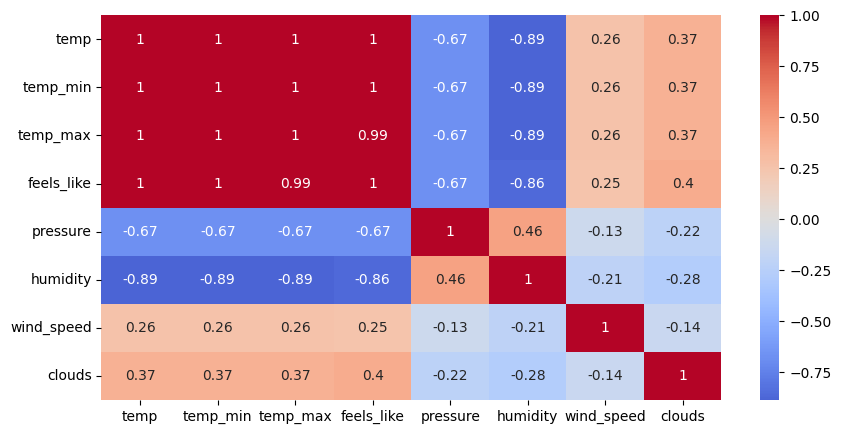

In [ ]:
import seaborn as sns


corr_matrix = numericColumns.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.figure(figsize=(10,5))

plt.show()


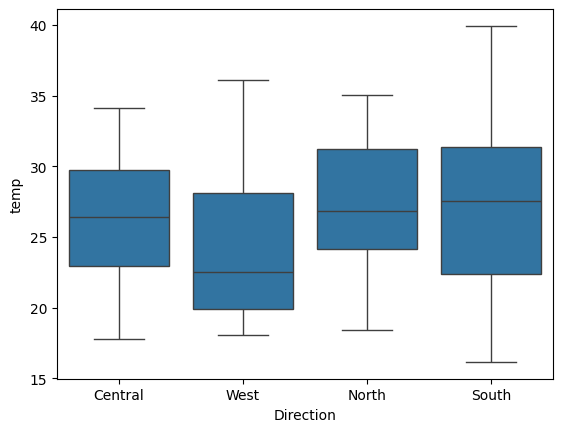

In [5]:
sns.boxplot(x='Direction', y='temp', data=cleanDf)
plt.show()

In [6]:
cleanDf.groupby('Direction')[['weather']].value_counts(sort=True)

Direction  weather         
Central    Overcast Clouds      90
           Broken Clouds        60
           Scattered Clouds      8
           Clear Sky             5
           Few Clouds            5
North      Overcast Clouds     230
           Broken Clouds        62
           Scattered Clouds     21
           Light Rain           11
           Moderate Rain         5
           Clear Sky             4
           Few Clouds            3
South      Clear Sky            65
           Broken Clouds        37
           Overcast Clouds      24
           Few Clouds           10
           Scattered Clouds      8
West       Broken Clouds        51
           Scattered Clouds     34
           Few Clouds           21
           Overcast Clouds      20
           Clear Sky            18
Name: count, dtype: int64

In [7]:
cleanDf.groupby('Direction')['wind_speed'].min().sort_values(ascending=True)

Direction
Central    0.00
North      0.10
West       0.35
South      0.75
Name: wind_speed, dtype: float64

In [8]:
cleanDf.groupby('Direction')['wind_speed'].max().sort_values(ascending=False)

Direction
South      11.31
Central     7.36
West        7.16
North       7.15
Name: wind_speed, dtype: float64

In [9]:
cleanDf.groupby('Direction')['sunrise time'].min().sort_values(ascending=True)


Direction
North      05:57:06
South      05:58:27
Central    06:09:01
West       06:23:07
Name: sunrise time, dtype: object

In [10]:
cleanDf.groupby('Direction')['temp_max'].max().sort_values(ascending=False)

Direction
South      39.92
West       36.12
North      35.02
Central    34.14
Name: temp_max, dtype: float64

In [11]:
cleanDf.groupby('Direction')['temp_min'].min().sort_values(ascending=True)

Direction
South      16.17
Central    17.76
West       18.07
North      18.43
Name: temp_min, dtype: float64

In [12]:
cleanDf.groupby('Direction')['sunrise time'].max().sort_values(ascending=False)


Direction
North      08:59:09
West       06:28:24
Central    06:22:07
South      06:15:45
Name: sunrise time, dtype: object

In [13]:
cleanDf.groupby('Direction')['sunset time'].min().sort_values(ascending=True)


Direction
North      19:03:10
Central    19:31:34
South      19:42:01
West       19:43:50
Name: sunset time, dtype: object

In [14]:
cleanDf.groupby('Direction')['sunset time'].max().sort_values(ascending=False)


Direction
North      20:36:54
South      19:57:24
West       19:52:31
Central    19:41:25
Name: sunset time, dtype: object

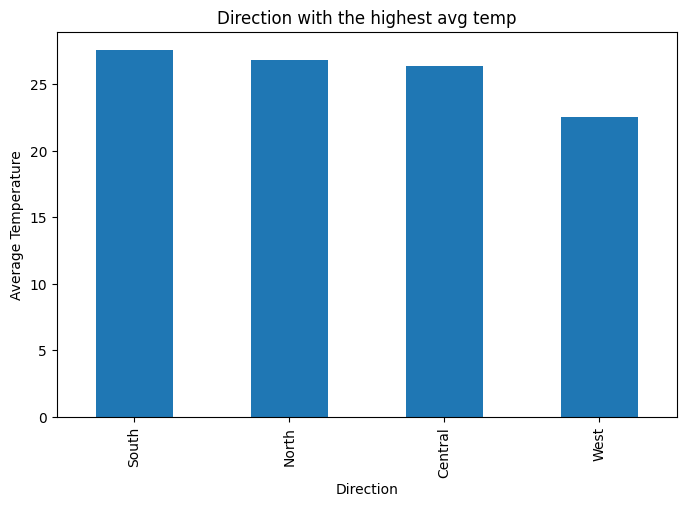

In [15]:
cleanDf.groupby('Direction')['temp'].median().sort_values(ascending=False).plot(kind='bar',figsize=(8,5))
plt.xlabel('Direction')
plt.title('Direction with the highest avg temp')
plt.ylabel('Average Temperature')
plt.show()



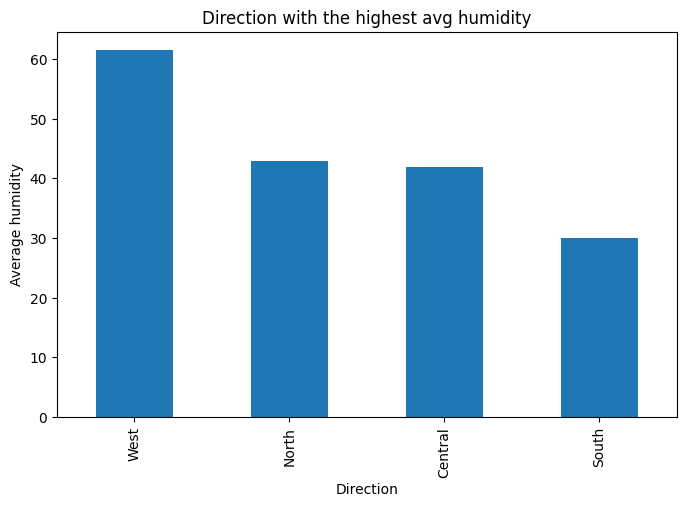

In [16]:
cleanDf.groupby('Direction')['humidity'].median().sort_values(ascending=False).plot(kind='bar',figsize=(8,5))
plt.xlabel('Direction')
plt.title('Direction with the highest avg humidity')
plt.ylabel('Average humidity')
plt.show()



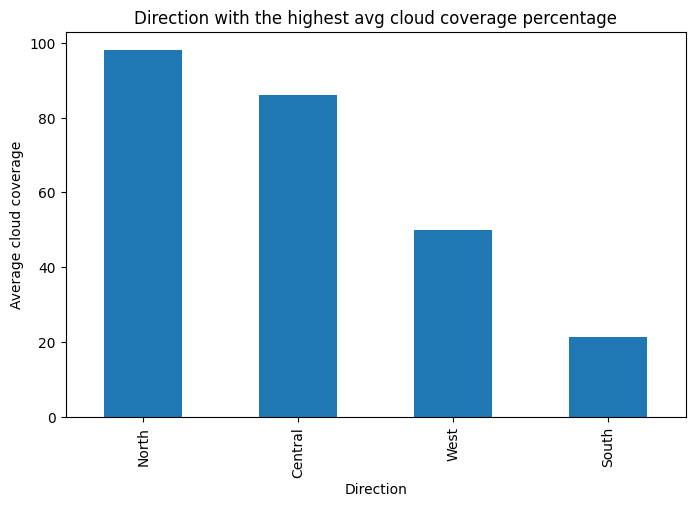

In [17]:
cleanDf.groupby('Direction')['clouds'].median().sort_values(ascending=False).plot(kind='bar',figsize=(8,5))
plt.xlabel('Direction')
plt.title('Direction with the highest avg cloud coverage percentage')
plt.ylabel('Average cloud coverage')
plt.show()



# Regional Analysis

In [18]:
cleanDf.groupby('Region')['wind_speed'].max().sort_values(ascending=False).head(5)

Region
Karas           11.31
Hardap           7.65
Otjozondjupa     7.36
Erongo           7.16
Kunene           7.15
Name: wind_speed, dtype: float64

In [19]:
cleanDf.groupby('Region')['wind_speed'].min().sort_values(ascending=True).head(5)

Region
Otjozondjupa    0.00
Oshana          0.10
Omaheke         0.16
Ohangwena       0.24
Zambezi         0.33
Name: wind_speed, dtype: float64

In [20]:
cleanDf.groupby('Region')['temp_min'].min().sort_values(ascending=True).head(3)

Region
Karas           16.17
Otjozondjupa    17.76
Erongo          18.07
Name: temp_min, dtype: float64

In [21]:
cleanDf.groupby('Region')['temp_min'].max().sort_values(ascending=False).head(3)

Region
Karas     39.92
Hardap    36.87
Erongo    36.12
Name: temp_min, dtype: float64

In [22]:
cleanDf.groupby('Region')['sunset time'].min().sort_values(ascending=True).head(3)

Region
Zambezi         19:03:10
Kavango East    19:21:57
Otjozondjupa    19:31:34
Name: sunset time, dtype: object

In [23]:
cleanDf.groupby('Region')['temp_min'].max().sort_values(ascending=False).head(3)

Region
Karas     39.92
Hardap    36.87
Erongo    36.12
Name: temp_min, dtype: float64

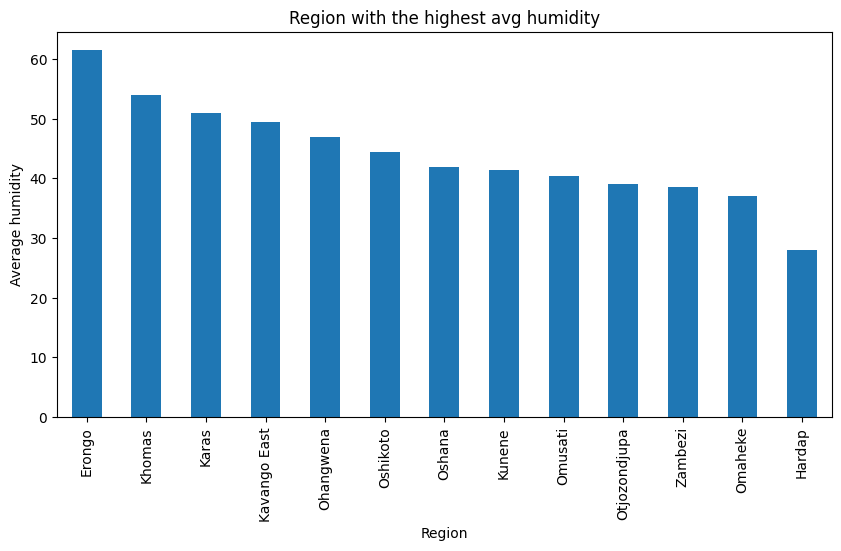

In [24]:
cleanDf.groupby('Region')['humidity'].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.xlabel('Region')
plt.title('Region with the highest avg humidity')
plt.ylabel('Average humidity')
plt.show()

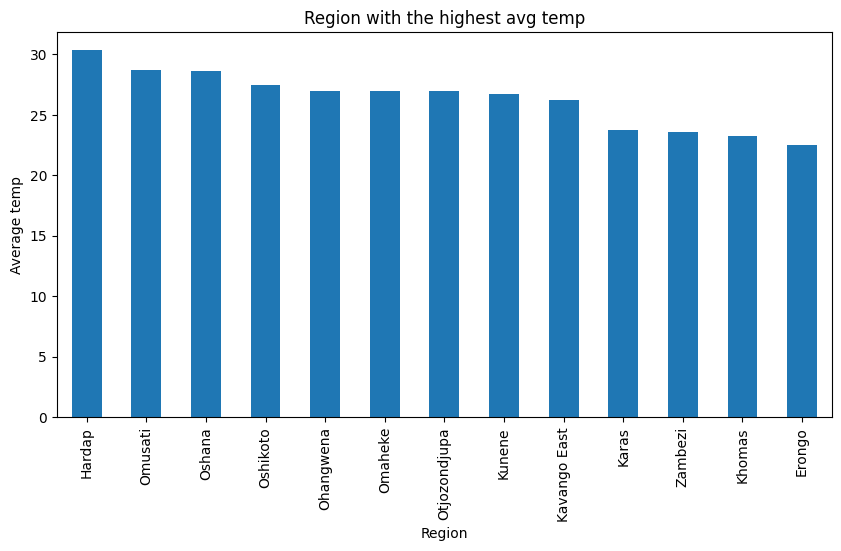

In [25]:
cleanDf.groupby('Region')['temp'].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.xlabel('Region')
plt.title('Region with the highest avg temp')
plt.ylabel('Average temp')
plt.show()

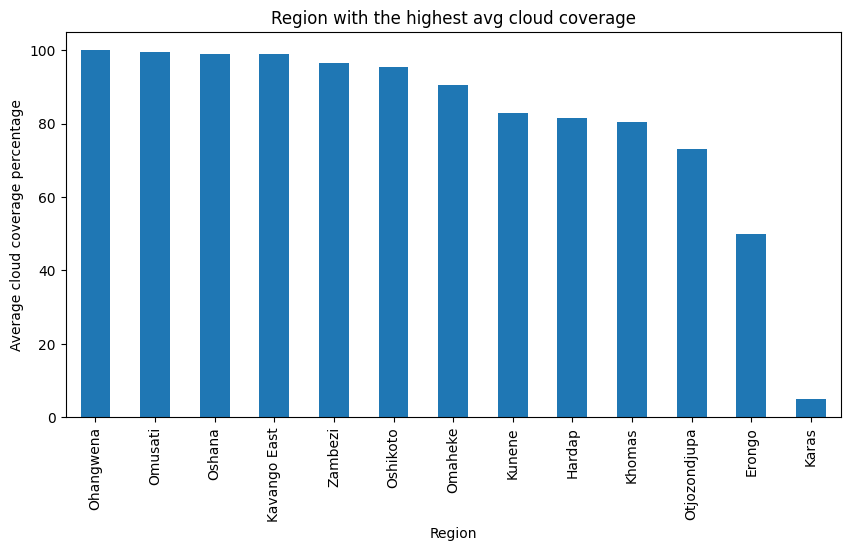

In [26]:
cleanDf.groupby('Region')['clouds'].median().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.xlabel('Region')
plt.title('Region with the highest avg cloud coverage')
plt.ylabel('Average cloud coverage percentage')
plt.show()

# City Analysis

In [27]:
cleanDf.groupby('city')['wind_speed'].max().sort_values(ascending=False).head(5)

city
Keetmanshoop    11.31
Karasburg       10.35
Mariental        7.65
Luderitz         7.51
Otjiwarongo      7.36
Name: wind_speed, dtype: float64

In [28]:
cleanDf.groupby('city')['wind_speed'].min().sort_values(ascending=True).head(5)

city
Grootfontein    0.00
Oshakati        0.10
Witvlei         0.16
Helao Nafidi    0.24
Kongola         0.33
Name: wind_speed, dtype: float64

In [29]:
cleanDf.groupby('city')['temp_min'].min().sort_values(ascending=True).head(3)

city
Oranjemund      16.17
Luderitz        17.69
Grootfontein    17.76
Name: temp_min, dtype: float64

In [30]:
cleanDf.groupby('city')['temp_min'].max().sort_values(ascending=False).head(3)

city
Keetmanshoop    39.92
Karasburg       39.50
Mariental       36.87
Name: temp_min, dtype: float64

In [31]:
cleanDf.groupby('city')['sunset time'].min().sort_values(ascending=True).head(3)

city
Katima Mulilo    19:03:10
Rundu            19:21:57
Grootfontein     19:31:34
Name: sunset time, dtype: object

In [32]:
cleanDf.groupby('city')['sunrise time'].min().sort_values(ascending=True).head(3)

city
Katima Mulilo    05:57:06
Karasburg        05:58:27
Keetmanshoop     06:03:59
Name: sunrise time, dtype: object

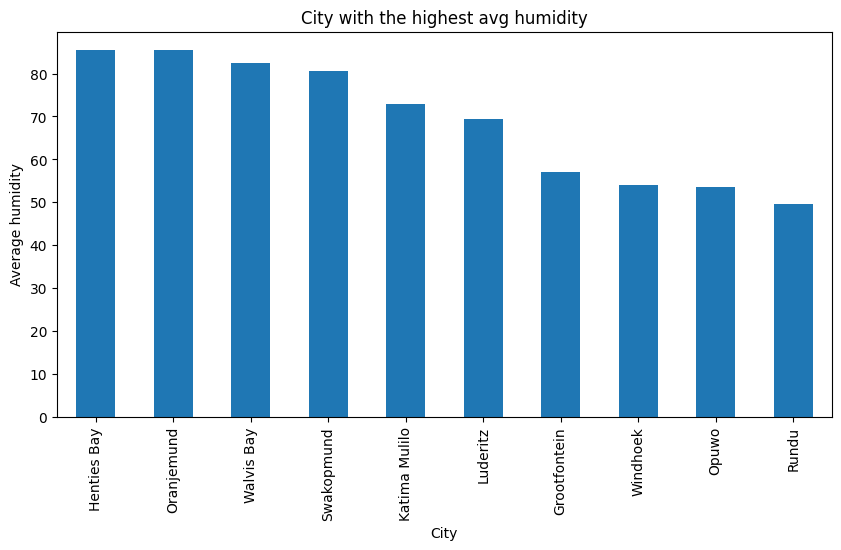

In [33]:
cleanDf.groupby('city')['humidity'].median().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,5))
plt.xlabel('City')
plt.title('City with the highest avg humidity')
plt.ylabel('Average humidity')
plt.show()

In [34]:

import math

highHumidityAndRained =cleanDf[cleanDf['humidity']>= 65.0].shape[0] / cleanDf['city'].shape[0] * 100
print(f'{math.floor(highHumidityAndRained)}%')




21%


In [35]:
rained = cleanDf[cleanDf['weather'].isin(['Heavy Rain','Light Rain','Moderate Rain'])]
rained



,city,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds,weather,sunrise time,sunset time,Region,Direction
107,Ongwediva,25.37,25.35,25.37,25.37,1009.0,53.0,2.46,100.0,Light Rain,06:30:36,19:37:41,Oshana,North
108,Ompundja,25.27,25.21,25.27,25.27,1009.0,52.0,2.99,100.0,Light Rain,06:30:38,19:38:11,Oshana,North
114,Oniipa,24.54,24.56,24.54,24.54,1010.0,58.0,2.68,100.0,Moderate Rain,06:29:16,19:36:49,Oshikoto,North
139,Oshakati,24.39,24.32,24.39,24.39,1010.0,55.0,2.70,99.0,Light Rain,06:30:56,19:38:01,Oshana,North
140,Ongwediva,24.37,24.32,24.37,24.37,1010.0,56.0,2.57,98.0,Light Rain,06:30:36,19:37:41,Oshana,North
142,Eenhana,21.16,21.37,21.16,21.16,1011.0,78.0,2.05,100.0,Light Rain,06:28:55,19:34:51,Ohangwena,North
143,Helao Nafidi,23.47,23.65,23.47,23.47,1010.0,68.0,1.01,100.0,Moderate Rain,06:30:45,19:36:32,Ohangwena,North
147,Oniipa,23.80,23.83,23.80,23.80,1010.0,61.0,2.73,100.0,Light Rain,06:29:16,19:36:49,Oshikoto,North
172,Oshakati,23.81,23.79,23.81,23.81,1010.0,59.0,3.09,99.0,Light Rain,06:30:56,19:38:01,Oshana,North
173,Ongwediva,23.49,23.49,23.49,23.49,1010.0,61.0,3.11,99.0,Light Rain,06:30:36,19:37:41,Oshana,North


In [36]:
rained.shape[0]

16

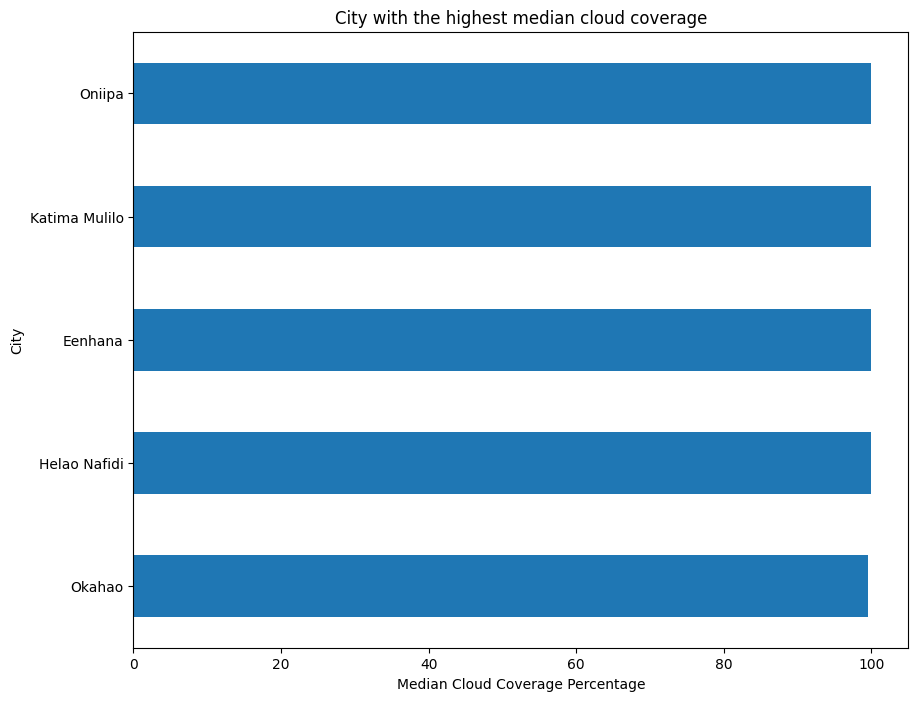

In [37]:


cleanDf.groupby('city')['clouds'].median().sort_values(ascending=True).tail(5).plot(kind='barh',figsize=(10,8))
plt.title('City with the highest median cloud coverage')
plt.xlabel('Median Cloud Coverage Percentage')
plt.ylabel('City')
plt.show()




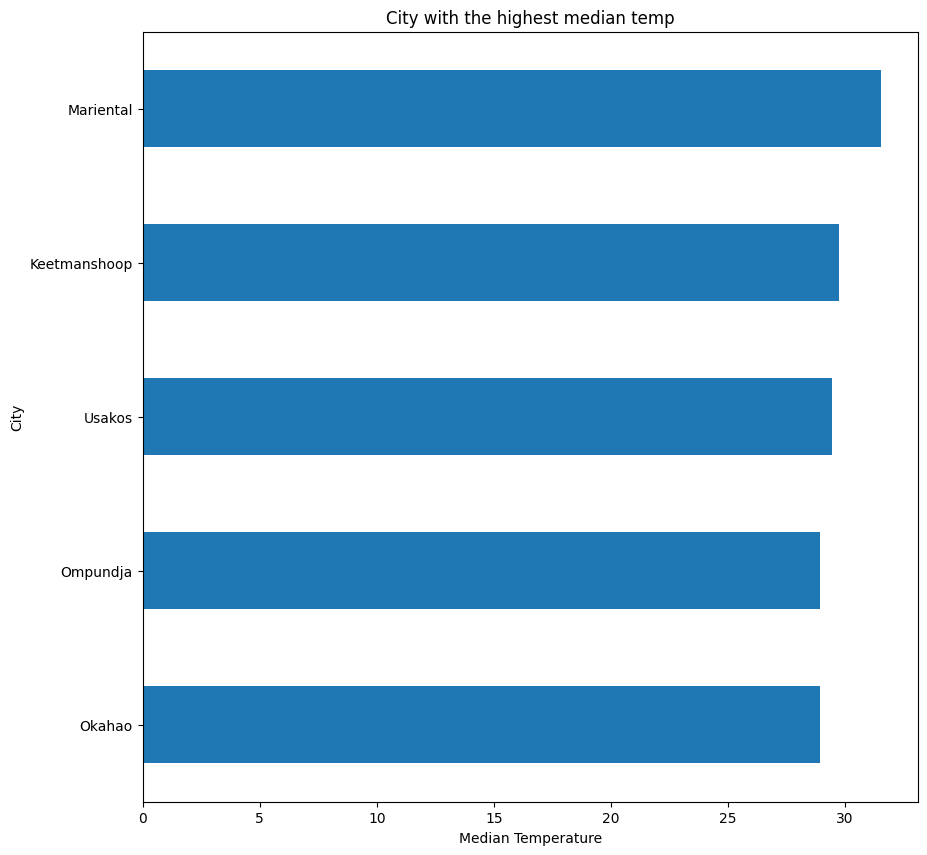

In [38]:


cleanDf.groupby('city')['temp'].median().sort_values(ascending=True).tail(5).plot(kind='barh',figsize=(10,10))
plt.title('City with the highest median temp')
plt.xlabel('Median Temperature')
plt.ylabel('City')
plt.show()

